# SN Different Roll Periods
Exploring the S/N for different roll periods.

In [14]:
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from enum import Enum
from dask.diagnostics import ProgressBar


# Custom xarray classes that addes different method.
import xarray_class_accessors as xca

# Custom plots for signal to noise functions.
import sn_plotting as sn_plot

In [15]:
# The directory where all of the longrun mip data used in this notebook is stored.
# ROOT_DIR = '/g/data/w40/ab2313/longrunmip/'
ROOT_DIR = '/g/data/w40/ab2313/longrunmip/regrid_retimestamped'

In [16]:
# It takes a while to run the loess filter for each grid cell. So this has been pre-generated and saved.
LOESS_ROOT = os.path.join(ROOT_DIR, 'loess')
LOESS_ROOT

'/g/data/w40/ab2313/longrunmip/regrid_retimestamped/loess'

In [17]:
# All the files that have been loess filtered. 
# TODO: Consistent naming format. Some files have _loess at the end, whilst others do not.
os.listdir(LOESS_ROOT)

['tas_ann_MPIESM11_abrupt4x_4459_g025_loess.nc']

In [18]:
IMG_DIR = '../../images/PhD/init'

In [19]:
fname = 'tas_ann_MPIESM11_abrupt4x_4459_g025'
model = 'MPIESM11'

In [20]:
class Locations(Enum):
    EPACIFIC = (2.7 ,-85)
    NATLANTIC = (2.2, -8)
    ECHINA_SEA = (26, 128)
    MELBOURNE = (-38, 145)
    LONDON = (51, 0.12)
    NY = (40, 74)
    BEIJING = (40, 116) 
    BUENOS_AIRES = (35, 58)
    KINSHASA = (4.4, 15.2)
    ARTIC = (76, 100)

# Loading Data
In this notebook everythning need to be run together to check the affect of having different roll period.s

In [21]:
path_control = os.path.join(ROOT_DIR, 'tas_mon_MPIESM12_control_1237_g025.nc')
path_control

'/g/data/w40/ab2313/longrunmip/regrid_retimestamped/tas_mon_MPIESM12_control_1237_g025.nc'

In [22]:
control_chunks = {'lat':48/2,'lon':96/2,'time':-1}

In [23]:
control = xr.open_dataset(path_control, use_cftime = True, chunks = control_chunks).tas
control #= control.rename({'month':'time'})

<xarray.DataArray 'tas' (time: 1237, lat: 72, lon: 144)>
dask.array<open_dataset-2eae3236c94a52b7729b1803300f75adtas, shape=(1237, 72, 144), dtype=float32, chunksize=(1237, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1236-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75

In [28]:
control = xr.open_dataset(path_control,use_cftime = True, chunks = control_chunks).tas
# control = control.rename({'month':'time'})
control

<xarray.DataArray 'tas' (time: 1237, lat: 72, lon: 144)>
dask.array<open_dataset-2eae3236c94a52b7729b1803300f75adtas, shape=(1237, 72, 144), dtype=float32, chunksize=(1237, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1236-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75

In [29]:
path_abrupt4 = os.path.join(ROOT_DIR, 'tas_ann_MPIESM11_abrupt4x_4459_g025.nc')
path_abrupt4

'/g/data/w40/ab2313/longrunmip/regrid_retimestamped/tas_ann_MPIESM11_abrupt4x_4459_g025.nc'

In [31]:
abrupt = xr.open_dataset(path_abrupt4).tas
# abrupt = abrupt.rename({'year': 'time'})
abrupt

<xarray.DataArray 'tas' (time: 4459, lat: 72, lon: 144)>
[46230912 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0000-12-31 00:00:00 ... 4458-12-31 00:00:00
Attributes:
    long_name:  Near-Surface Air Temperature; usually on 2m
    units:      K
    code:       167
    table:      128

# Space Means

In [32]:
# The anomalies for the contorl.
control_anom = control.clima.anomalies(start = control.time.dt.year.values[0], 
                                          end = control.time.dt.year.values[-1])

# THe global mean of the anomalies.
control_anom_smean = control_anom.clima.space_mean()
control_anom_smean

<xarray.DataArray 'tas' (time: 1237)>
dask.array<truediv, shape=(1237,), dtype=float64, chunksize=(8,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1236-12-31 00:00:00

In [33]:
# Getting the temperature anomalies.
abrupt_anom = abrupt.clima.anomalies(start = control.time.dt.year.values[0], 
                                          end = control.time.dt.year.values[-1],
                            historical = control)

abrupt_anom_smean = abrupt_anom.clima.space_mean()
abrupt_anom_smean

Using historical dataset


<xarray.DataArray 'tas' (time: 4459)>
dask.array<truediv, shape=(4459,), dtype=float64, chunksize=(8,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 4458-12-31 00:00:00

# Signal To Noise

In [34]:
#### Control
# Singal
control_anom_smean_signal = control_anom_smean.sn.signal_grad(roll_period = 61)

# Noise
control_anom_smean_loess = control_anom_smean.sn.loess_grid()
control_anom_smean_noise = control_anom_smean_loess.sn.noise_grad(roll_period = 61)

# Signal to Noise
control_anom_smean_sn = control_anom_smean_signal/control_anom_smean_noise

# The upper and lower bounds of what is stable.
control_smean_ubound = control_anom_smean_sn.reduce(xca.dask_percentile,dim='time', q=99)
control_smean_lbound = control_anom_smean_sn.reduce(xca.dask_percentile,dim='time', q=1)


### Quad CO2

abrupt_anom_smean_signal = abrupt_anom_smean.sn.signal_grad(roll_period = 61)
abrupt_anom_smean_loess = abrupt_anom_smean.sn.loess_grid()
abrupt_anom_smean_noise = abrupt_anom_smean_loess.sn.noise_grad(roll_period = 61)
abrupt_anom_smean_sn = abrupt_anom_smean_signal/abrupt_anom_smean_noise


# TEMP
# The global mean temperature anomalies that are stable
abrupt_anom_smean_stable = abrupt_anom_smean.where(
    np.logical_and(
                        abrupt_anom_smean_sn <= control_smean_ubound,
                        abrupt_anom_smean_sn >= control_smean_lbound 
                            )
                                  )
# Increasing temperature
abrupt_anom_smean_increasing = abrupt_anom_smean.where(
                        abrupt_anom_smean_sn >= control_smean_ubound 
                            )
# Decreasing temperature.
abrupt_anom_smean_decreasing = abrupt_anom_smean.where(
                        abrupt_anom_smean_sn <= control_smean_lbound 
                            )

# SN
# The global mean signal-to-noise points that are stable
abrupt_anom_smean_sn_stable = abrupt_anom_smean_sn.where(
    np.logical_and(
                        abrupt_anom_smean_sn <= control_smean_ubound,
                        abrupt_anom_smean_sn >= control_smean_lbound 
                            )
)

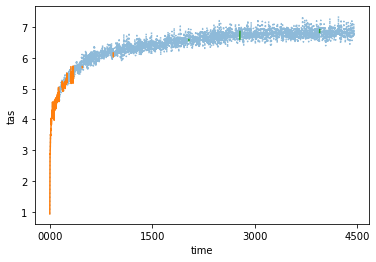

In [35]:
abrupt_anom_smean.plot(alpha = 0.5, linestyle=':')
abrupt_anom_smean_increasing.plot()
abrupt_anom_smean_decreasing.plot()

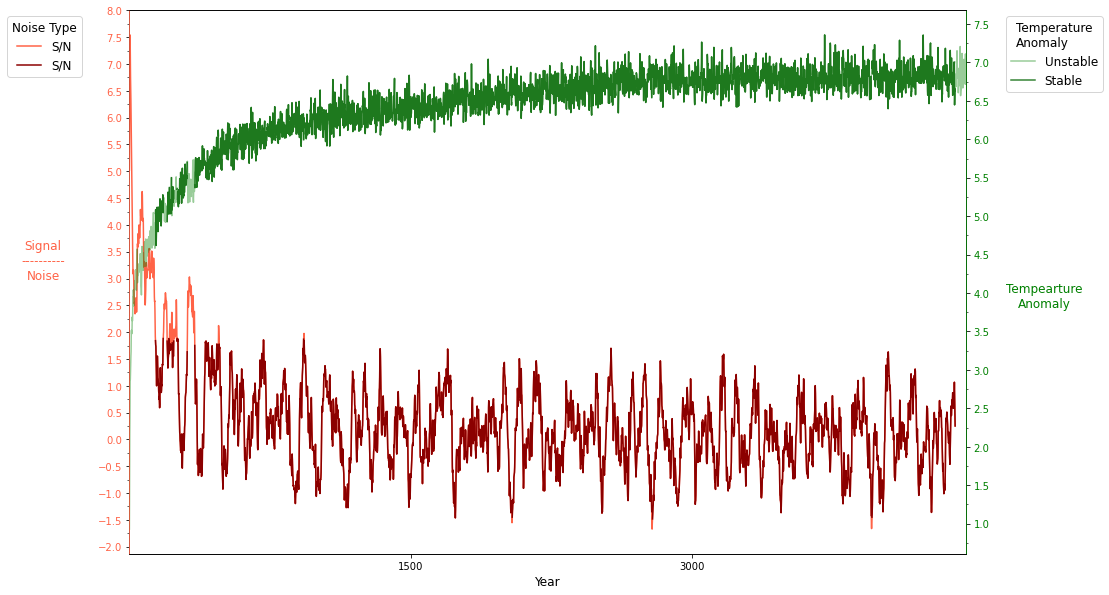

In [36]:
fig = plt.figure(figsize=  (15,10))
ax = fig.add_subplot(111)

sn_plot.temperature_vs_sn_plot(ax,  abrupt_anom_smean_sn, abrupt_anom_smean,
                      temp_highlight = abrupt_anom_smean_stable, 
                      sn_highlight = abrupt_anom_smean_sn_stable)


fig.savefig(f'{IMG_DIR}/{model}_global_sn_temp_anomaly.png', bbox_inches='tight', dpi=500)

# Applying with for loop

In [37]:
control_anom_smean = control_anom_smean.compute()
control_anom_smean_loess = control_anom_smean_loess.compute()

In [38]:
%%time


decreasing_array = []
increasing_array = []
stable_array = []
sn_array = []
lower_bound_array = []
upper_bound_array = []

roll_periods = range(21, 521,8)

for roll_period in roll_periods:
    
    print(f'{roll_period}, ', end='')

    #### Control
        # Singal
    control_anom_smean_signal = control_anom_smean.sn.signal_grad(roll_period = roll_period)


    # Noise
    control_anom_smean_loess = control_anom_smean.sn.loess_grid()
    control_anom_smean_noise = control_anom_smean_loess.sn.noise_grad(roll_period = roll_period)

    # Signal to Noise
    control_anom_smean_sn = control_anom_smean_signal/control_anom_smean_noise

    # The upper and lower bounds of what is stable.
    control_smean_ubound = control_anom_smean_sn.max(dim='time')#.reduce(xca.dask_percentile,dim='time', q=99)
    control_smean_lbound = control_anom_smean_sn.min(dim='time')#.reduce(xca.dask_percentile,dim='time', q=1)
    
    lower_bound_array.append(control_smean_lbound.values)
    upper_bound_array.append(control_smean_ubound.values)

21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 221, 229, 237, 245, 253, 261, 269, 277, 285, 293, 301, 309, 317, 325, 333, 341, 349, 357, 365, 373, 381, 389, 397, 405, 413, 421, 429, 437, 445, 453, 461, 469, 477, 485, 493, 501, 509, 517, CPU times: user 33.7 s, sys: 537 ms, total: 34.2 s
Wall time: 34.3 s


In [34]:
control_anom_smean_sn.max().values

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


array(nan)

In [32]:
control_smean_ubound.values

array(nan)

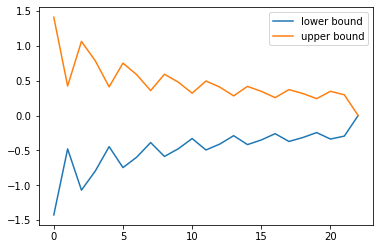

In [20]:
plt.plot(lower_bound_array, label = 'lower bound')
plt.plot(upper_bound_array, label = 'upper bound')
plt.legend()

In [40]:
%%time


decreasing_array = []
increasing_array = []
stable_array = []
sn_array = []
lower_bound_array = []
upper_bound_array = []

roll_periods = range(21, 521,8)

for roll_period in roll_periods:
    
    print(f'{roll_period}, ', end='')

    #### Control
        # Singal
    control_anom_smean_signal = control_anom_smean.sn.signal_grad(roll_period = roll_period)


    # Noise
    control_anom_smean_loess = control_anom_smean.sn.loess_grid()
    control_anom_smean_noise = control_anom_smean_loess.sn.noise_grad(roll_period = roll_period)

    # Signal to Noise
    control_anom_smean_sn = control_anom_smean_signal/control_anom_smean_noise

    # The upper and lower bounds of what is stable.
    control_smean_ubound = control_anom_smean_sn.max(dim='time')#.reduce(xca.dask_percentile,dim='time', q=99)
    control_smean_lbound = control_anom_smean_sn.min(dim='time')#.reduce(xca.dask_percentile,dim='time', q=1)
    
    lower_bound_array.append(control_smean_lbound.values)
    upper_bound_array.append(control_smean_ubound.values)


    ### Quad CO2
    abrupt_anom_smean_signal = abrupt_anom_smean.sn.signal_grad(roll_period = roll_period)
    abrupt_anom_smean_loess = abrupt_anom_smean.sn.loess_grid()
    abrupt_anom_smean_noise = abrupt_anom_smean_loess.sn.noise_grad(roll_period = roll_period)
    abrupt_anom_smean_sn = abrupt_anom_smean_signal/abrupt_anom_smean_noise


    # TEMP
    # The global mean temperature anomalies that are stable
    abrupt_anom_smean_sn_stable = abrupt_anom_smean_sn.where(
        np.logical_and(
                            abrupt_anom_smean_sn <= control_smean_ubound,
                            abrupt_anom_smean_sn >= control_smean_lbound 
                                )
                                      )
    # Increasing temperature
    abrupt_anom_smean_sn_increasing = abrupt_anom_smean_sn.where(
                            abrupt_anom_smean_sn >= control_smean_ubound 
                                )
    # Decreasing temperature.
    abrupt_anom_smean_sn_decreasing = abrupt_anom_smean_sn.where(
                            abrupt_anom_smean_sn <= control_smean_lbound 
                                )
    

    increasing_array.append(abrupt_anom_smean_sn_increasing)
    decreasing_array.append(abrupt_anom_smean_sn_decreasing)
    stable_array.append(abrupt_anom_smean_sn_stable)

21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 221, 229, 237, 245, 253, 261, 269, 277, 285, 293, 301, 309, 317, 325, 333, 341, 349, 357, 365, 373, 381, 389, 397, 405, 413, 421, 429, 437, 445, 453, 461, 469, 477, 485, 493, 501, 509, 517, CPU times: user 17min 2s, sys: 2min 34s, total: 19min 37s
Wall time: 19min 12s


In [41]:
increasing_trend_sn_ds = xr.concat(increasing_array, pd.Index(roll_periods, name = 'roll_period'))
decreasing_trend_sn_ds = xr.concat(decreasing_array, pd.Index(roll_periods, name = 'roll_period'))

increasing_trend_sn_ds 

<xarray.DataArray (roll_period: 63, time: 4439)>
dask.array<concatenate, shape=(63, 4439), dtype=float64, chunksize=(1, 24), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 4438-12-31 00:00:00
  * roll_period  (roll_period) int64 21 29 37 45 53 61 ... 485 493 501 509 517

In [42]:
with ProgressBar():
    increasing_trend_sn_ds = increasing_trend_sn_ds.compute()

[########################################] | 100% Completed |  7min 10.6s


In [43]:
with ProgressBar():
    decreasing_trend_sn_ds = decreasing_trend_sn_ds.compute()

[########################################] | 100% Completed |  7min  3.0s


In [44]:
unstable_sn_array  = increasing_trend_sn_ds.fillna(0) + decreasing_trend_sn_ds.fillna(0)

unstable_sn_array = xr.where(unstable_sn_array != 0, unstable_sn_array, np.nan)

In [45]:
unstable_sn_array['time'] = unstable_sn_array.time.dt.year.values
unstable_sn_array.name = 'S/N'

In [46]:
unstable_sn_array

<xarray.DataArray 'S/N' (roll_period: 63, time: 4439)>
array([[ 4.00161037,  4.54167087,  5.29744358, ...,         nan,
                nan,         nan],
       [ 4.26888645,  4.97158403,  5.98006438, ...,         nan,
                nan,         nan],
       [ 4.59288349,  5.36360558,  6.5280454 , ...,         nan,
                nan,         nan],
       ...,
       [11.29312565, 13.06747912, 14.38701781, ...,         nan,
                nan,         nan],
       [11.41026491, 13.21447464, 14.53987515, ...,         nan,
                nan,         nan],
       [11.52657047, 13.34333942, 14.65025715, ...,         nan,
                nan,         nan]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 ... 4433 4434 4435 4436 4437 4438
  * roll_period  (roll_period) int64 21 29 37 45 53 61 ... 485 493 501 509 517

In [47]:
stable_sn_array = xr.where(np.isfinite(unstable_sn_array), 1, 0)
stable_sn_array

<xarray.DataArray 'S/N' (roll_period: 63, time: 4439)>
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 ... 4433 4434 4435 4436 4437 4438
  * roll_period  (roll_period) int64 21 29 37 45 53 61 ... 485 493 501 509 517

# Plot Info
* Use to be temperature as colors - now is S/N
* Should the S/N be as a ratio of the stable threshold, condisering that this is different for each roll_period

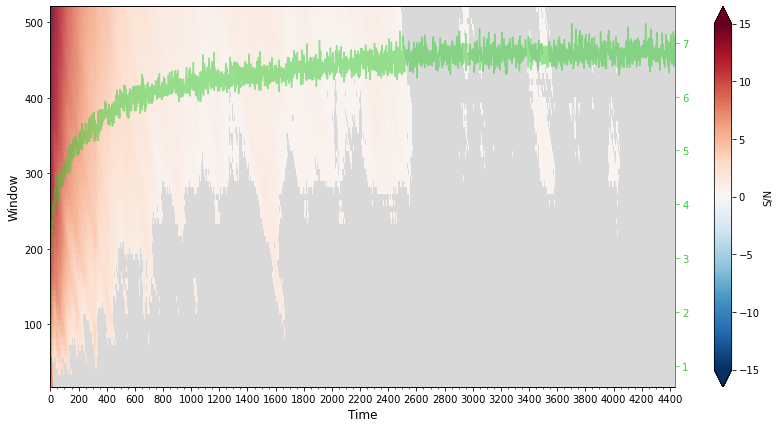

In [51]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(111)
unstable_sn_array.plot(ax=ax,cmap='RdBu_r', vmax = 15, vmin=-15, robust=True, extend='both')
stable_sn_array.plot(ax=ax,cmap='gist_gray', extend='both',
                     alpha = 0.15, add_colorbar = False)

ax.set_ylabel('Window', size = 12)

ax2 = ax.twinx()
ax2.plot(abrupt_anom_smean.time.dt.year.values, abrupt_anom_smean.values, color='limegreen',
         alpha= 0.5)

c1 = plt.gca().lines[-1].get_color()
ax2.spines['right'].set_color(c1)
ax2.tick_params(axis='y', colors=c1)


ax.set_xlabel('Time', size =12)
ax.xaxis.set_major_locator(mticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(50))

fig.savefig(f'{IMG_DIR}/{model}_global_sn_temp_anomaly_multi_window.png', bbox_inches='tight', dpi=500)